In [18]:
import os

import torch
import matplotlib.pyplot as plt
from IPython import display

from model import *
from dataset import *

In [2]:
base = torch.load('./models/baseline_bs50_no_aug/latest.pt', map_location='cpu')
aug = torch.load('./models/baseline_bs50_ctrans/latest.pt', map_location='cpu')
loc = torch.load('./models/baseline_bs50_cloc1.0_ctrans_no_aug/latest.pt', map_location='cpu')
aug_loc = torch.load('./models/baseline_bs50_cloc1.0_ctrans/latest.pt', map_location='cpu')

In [3]:
print(base.keys())
print(base['metadata'].keys())
print(base['metadata']['val'].keys())

dict_keys(['model_state_dict', 'optimizer_state_dict', 'epochs_trained', 'metadata'])
dict_keys(['train', 'val'])
dict_keys(['loss', 'macro_f1', 'micro_f1', 'samples_f1'])


In [4]:
def graph(data_type, metric, title):
    plt.plot(range(len(base['metadata'][data_type][metric])), base['metadata'][data_type][metric], label="base")
    plt.plot(range(len(aug['metadata'][data_type][metric])), aug['metadata'][data_type][metric], label="aug")
    plt.plot(range(len(loc['metadata'][data_type][metric])), loc['metadata'][data_type][metric], label="loc")
    plt.plot(range(len(aug_loc['metadata'][data_type][metric])), aug_loc['metadata'][data_type][metric], label="aug + loc")
    plt.title(title)
    plt.xlabel("Epochs")
    plt.legend()
    plt.show()

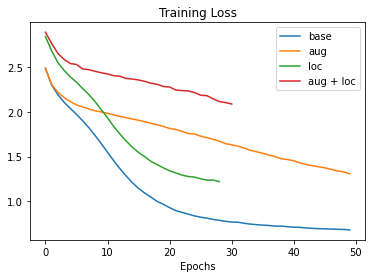

In [5]:
graph('train', 'loss', 'Training Loss')

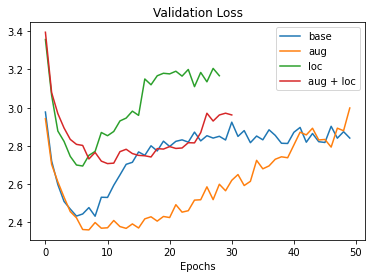

In [6]:
graph('val', 'loss', 'Validation Loss')

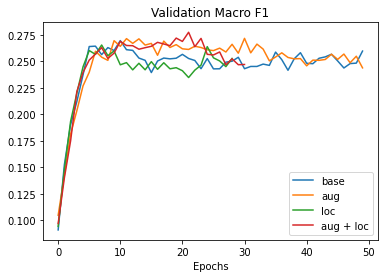

In [7]:
graph('val', 'macro_f1', 'Validation Macro F1')

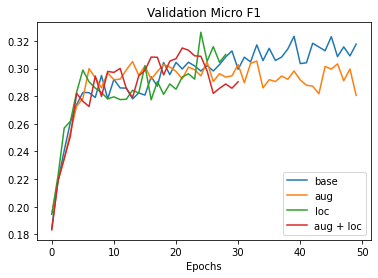

In [8]:
graph('val', 'micro_f1', 'Validation Micro F1')

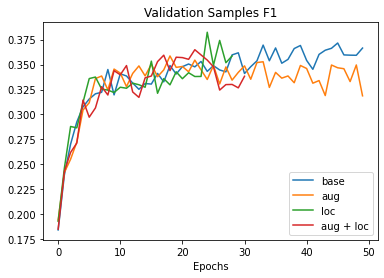

In [9]:
graph('val', 'samples_f1', 'Validation Samples F1')

# Model Predictions

In [3]:
virtex_best = torch.load('./models/vis_virtex_bs50/best_macro_f1.pt', map_location='cpu')
swin_tiny_best = torch.load('./models/vis_swin_tiny_bs50/best_macro_f1.pt', map_location='cpu')
swin_small_best = torch.load('./models/vis_swin_small_bs50/best_macro_f1.pt', map_location='cpu')

In [55]:
virtex_model = VirtexVisual()
virtex_model.load_state_dict(virtex_best['model_state_dict'])
virtex_model = virtex_model.eval()

Using cache found in /u/liaojh/.cache/torch/hub/kdexd_virtex_master


In [58]:
swin_tiny_model = SwinTransformerVisual(model_size='tiny')
swin_tiny_model.load_state_dict(swin_tiny_best['model_state_dict'])
swin_tiny_model = swin_tiny_model.eval()

In [60]:
swin_small_model = SwinTransformerVisual(model_size='small')
swin_small_model.load_state_dict(swin_small_best['model_state_dict'])
swin_small_model = swin_small_model.eval()

In [7]:
cwd = os.getcwd()
val_annotation_path = os.path.join(cwd, 'data', '2020intent', 'annotations', 'intentonomy_val2020.json')
img_dir = os.path.join(cwd, 'data', '2020intent', 'images', 'low')
val_dataset = Dataset(img_dir, val_annotation_path, get_transform(type='val'), type='val')

In [118]:
img, label, id = val_dataset[230]

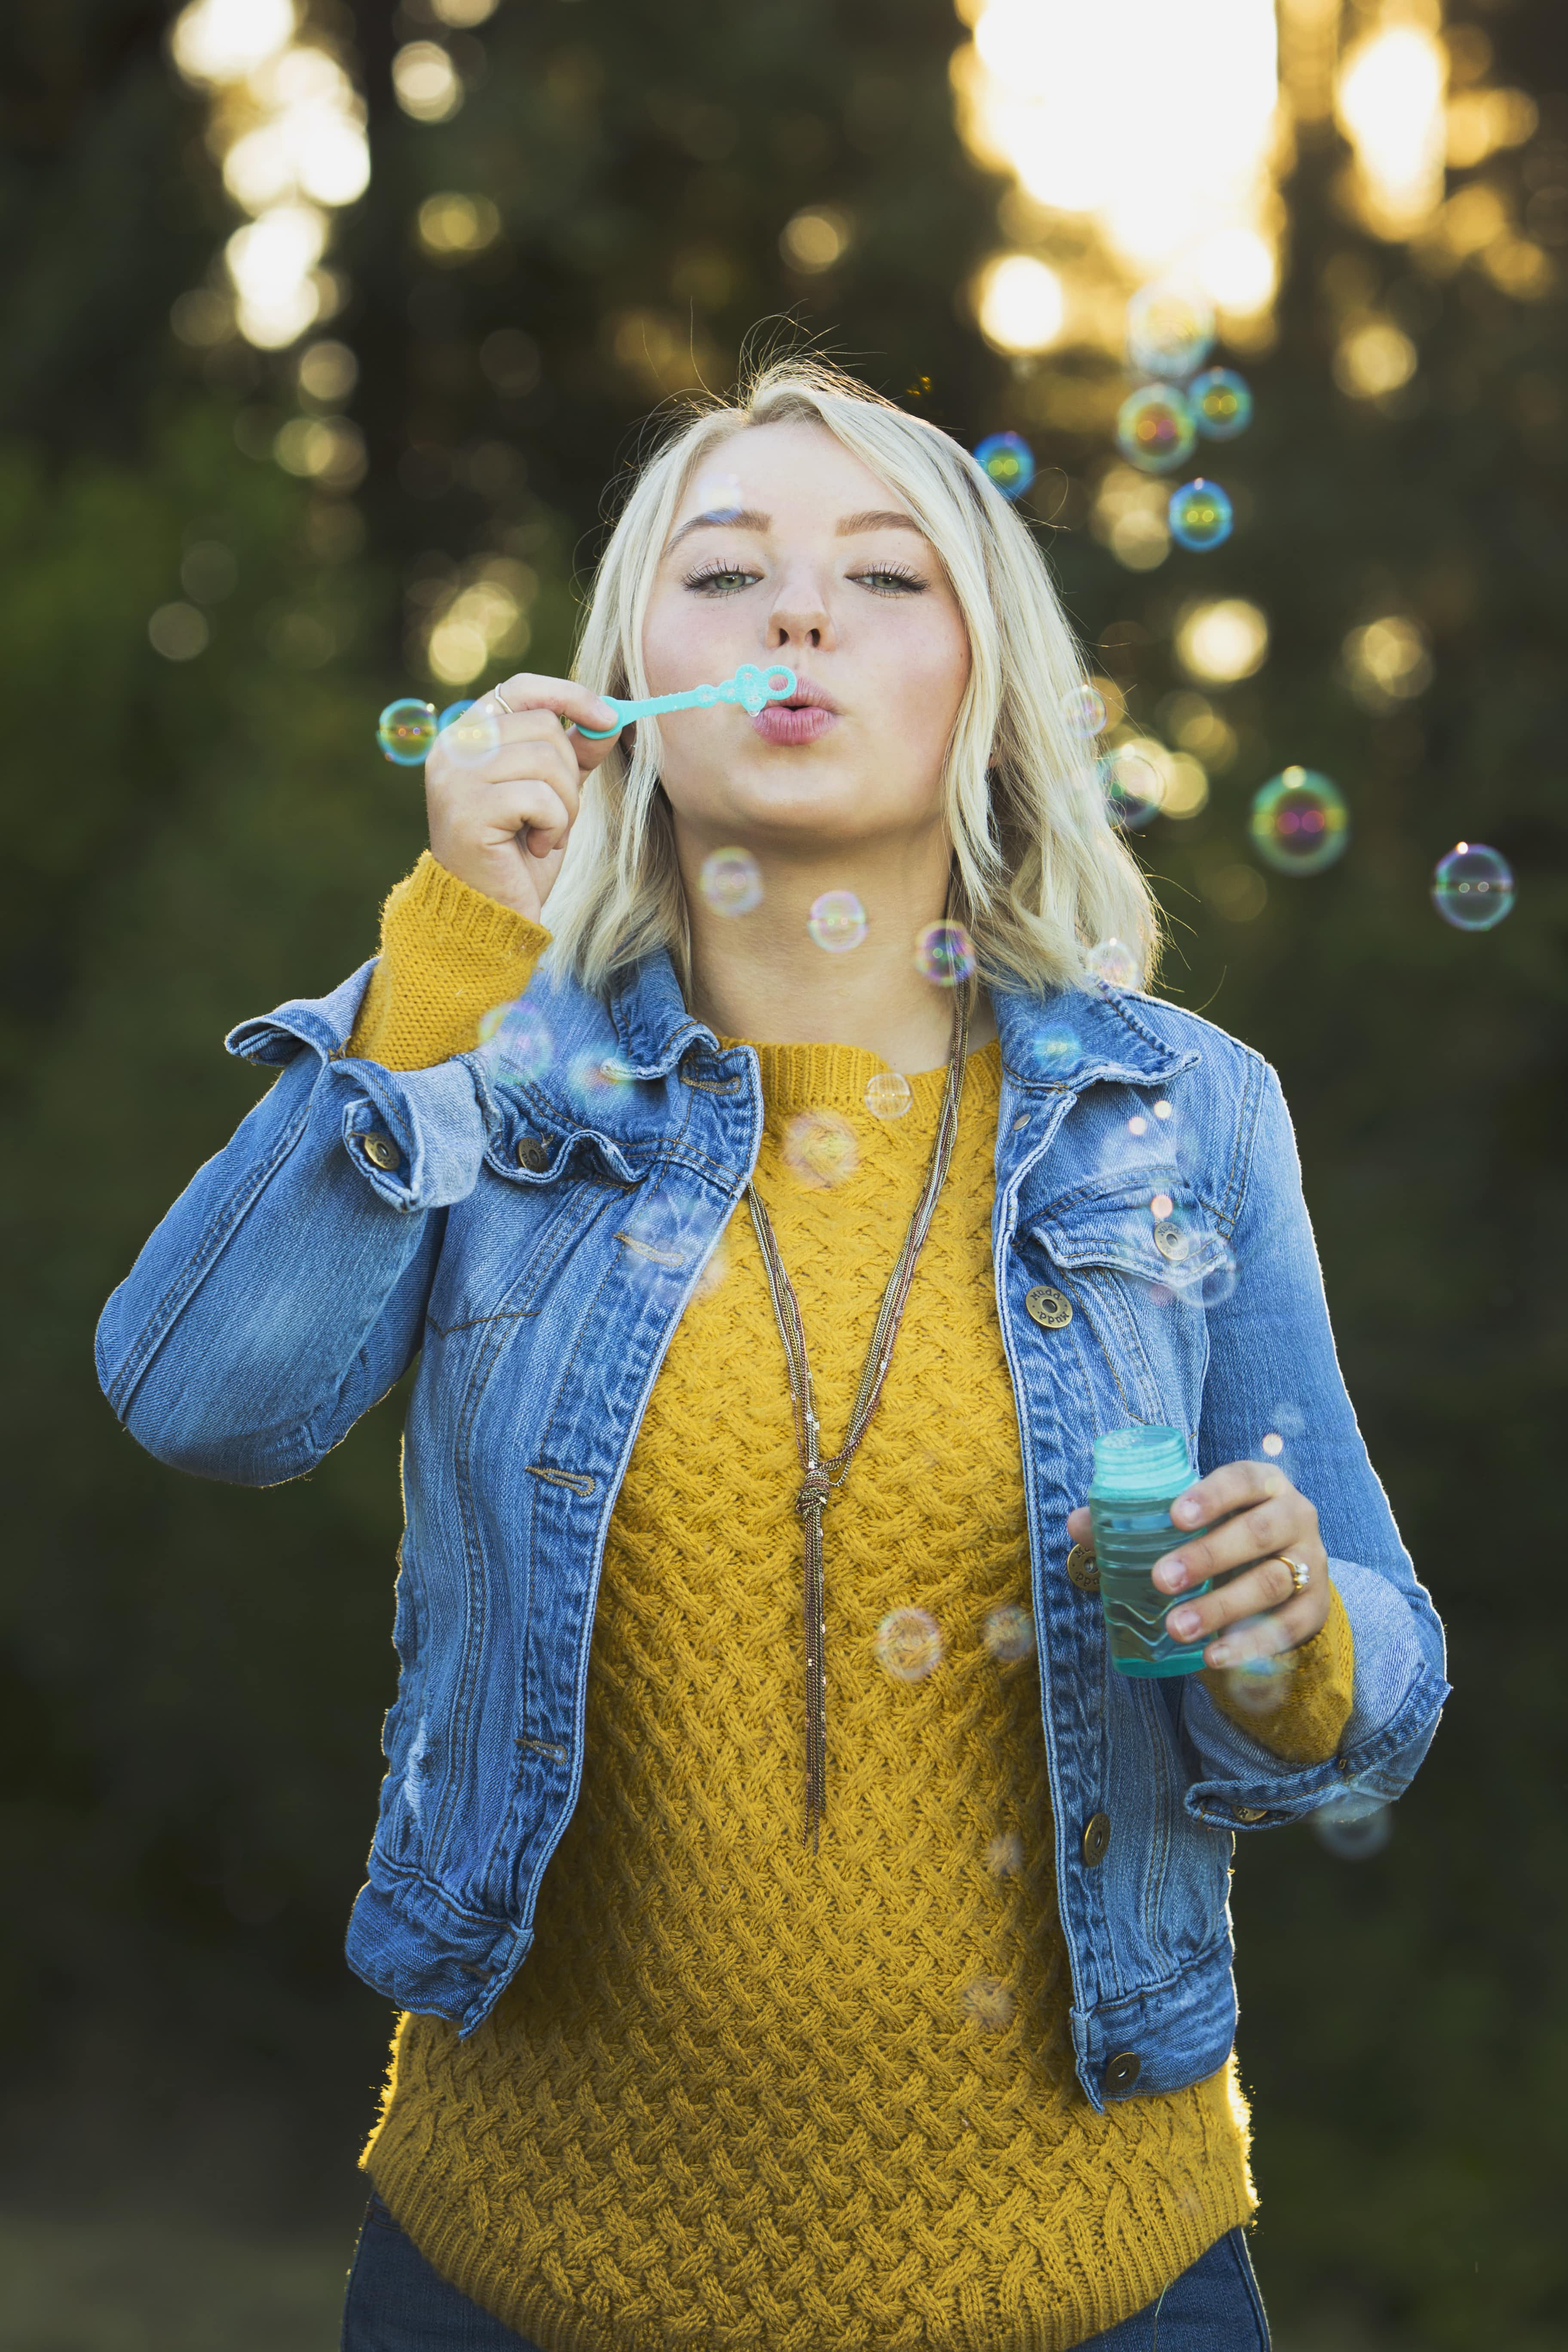

In [119]:
display.Image(filename=os.path.join(img_dir, id + ".jpg"))

In [120]:
print("True labels:")
for idx in range(28):
    if label[idx] == 1:
        print(idx)

True labels:
0
21


In [121]:
def predict(model):
    with torch.no_grad():
        model_pred = model(img.unsqueeze(0)).squeeze(0)
        model_pred = torch.softmax(model_pred, dim=-1)
        model_pred = model_pred.numpy()
    return model_pred

In [126]:
virtex_pred = predict(virtex_model)
print(virtex_pred)
scores = []
for idx in range(28):
    if virtex_pred[idx] >= 1/28:
        scores.append((idx, virtex_pred[idx]))
sorted(scores, key=lambda x: x[1], reverse=True)

[0.20855932 0.00578461 0.0045925  0.07846304 0.02072205 0.01028132
 0.01262297 0.01186771 0.02214031 0.20484047 0.01577283 0.0610308
 0.00123563 0.02049439 0.00774808 0.01159182 0.01849053 0.0056042
 0.00390111 0.01430795 0.01788191 0.1745497  0.00619005 0.01646875
 0.01637157 0.01006497 0.00606651 0.01235483]


[(0, 0.20855932),
 (9, 0.20484047),
 (21, 0.1745497),
 (3, 0.07846304),
 (11, 0.061030798)]

In [128]:
swin_tiny_pred = predict(swin_tiny_model)
print(swin_tiny_pred)
scores = []
for idx in range(28):
    if swin_tiny_pred[idx] >= 1/28:
        scores.append((idx, swin_tiny_pred[idx]))
sorted(scores, key=lambda x: x[1], reverse=True)

[0.11504266 0.00537043 0.00845659 0.08027196 0.00847122 0.00816684
 0.00788485 0.01423749 0.03110184 0.04209287 0.0162831  0.0339756
 0.00305129 0.01665014 0.00693805 0.0051039  0.01715225 0.00417553
 0.01131372 0.01726812 0.01439989 0.49078116 0.00380451 0.00614048
 0.00464726 0.00954964 0.00987385 0.00779481]


[(21, 0.49078116), (0, 0.11504266), (3, 0.08027196), (9, 0.042092867)]

In [129]:
swin_small_pred = predict(swin_small_model)
print(swin_small_pred)
scores = []
for idx in range(28):
    if swin_small_pred[idx] >= 1/28:
        scores.append((idx, swin_small_pred[idx]))
sorted(scores, key=lambda x: x[1], reverse=True)

[0.03443953 0.00494503 0.00685351 0.09331579 0.01157059 0.0106188
 0.00823862 0.0106954  0.02402658 0.03473505 0.02166704 0.04333989
 0.00405283 0.01341572 0.00637146 0.00846956 0.01907551 0.01215905
 0.00670794 0.00850833 0.01737425 0.5503361  0.01012987 0.0109528
 0.00416976 0.00872523 0.00722158 0.00788418]


[(21, 0.5503361), (3, 0.09331579), (11, 0.043339893)]